In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
import pandas as pd
import os

In [2]:
params = {} 
params["dataset_directory"] = "/raw-spiking-heidleberg-digits-80input/"
params["verbose"] = False

x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)
training_details = pd.read_csv(os.getcwd() + params.get("dataset_directory") + "training_details.csv")

speakers_list = np.array(list(training_details.loc[:, "Speaker"]))
speaker_list_unique = np.unique(speakers_list)

In [3]:
vr_distance_speaker_digit = np.load("vr_distance_speaker_digit.npy")

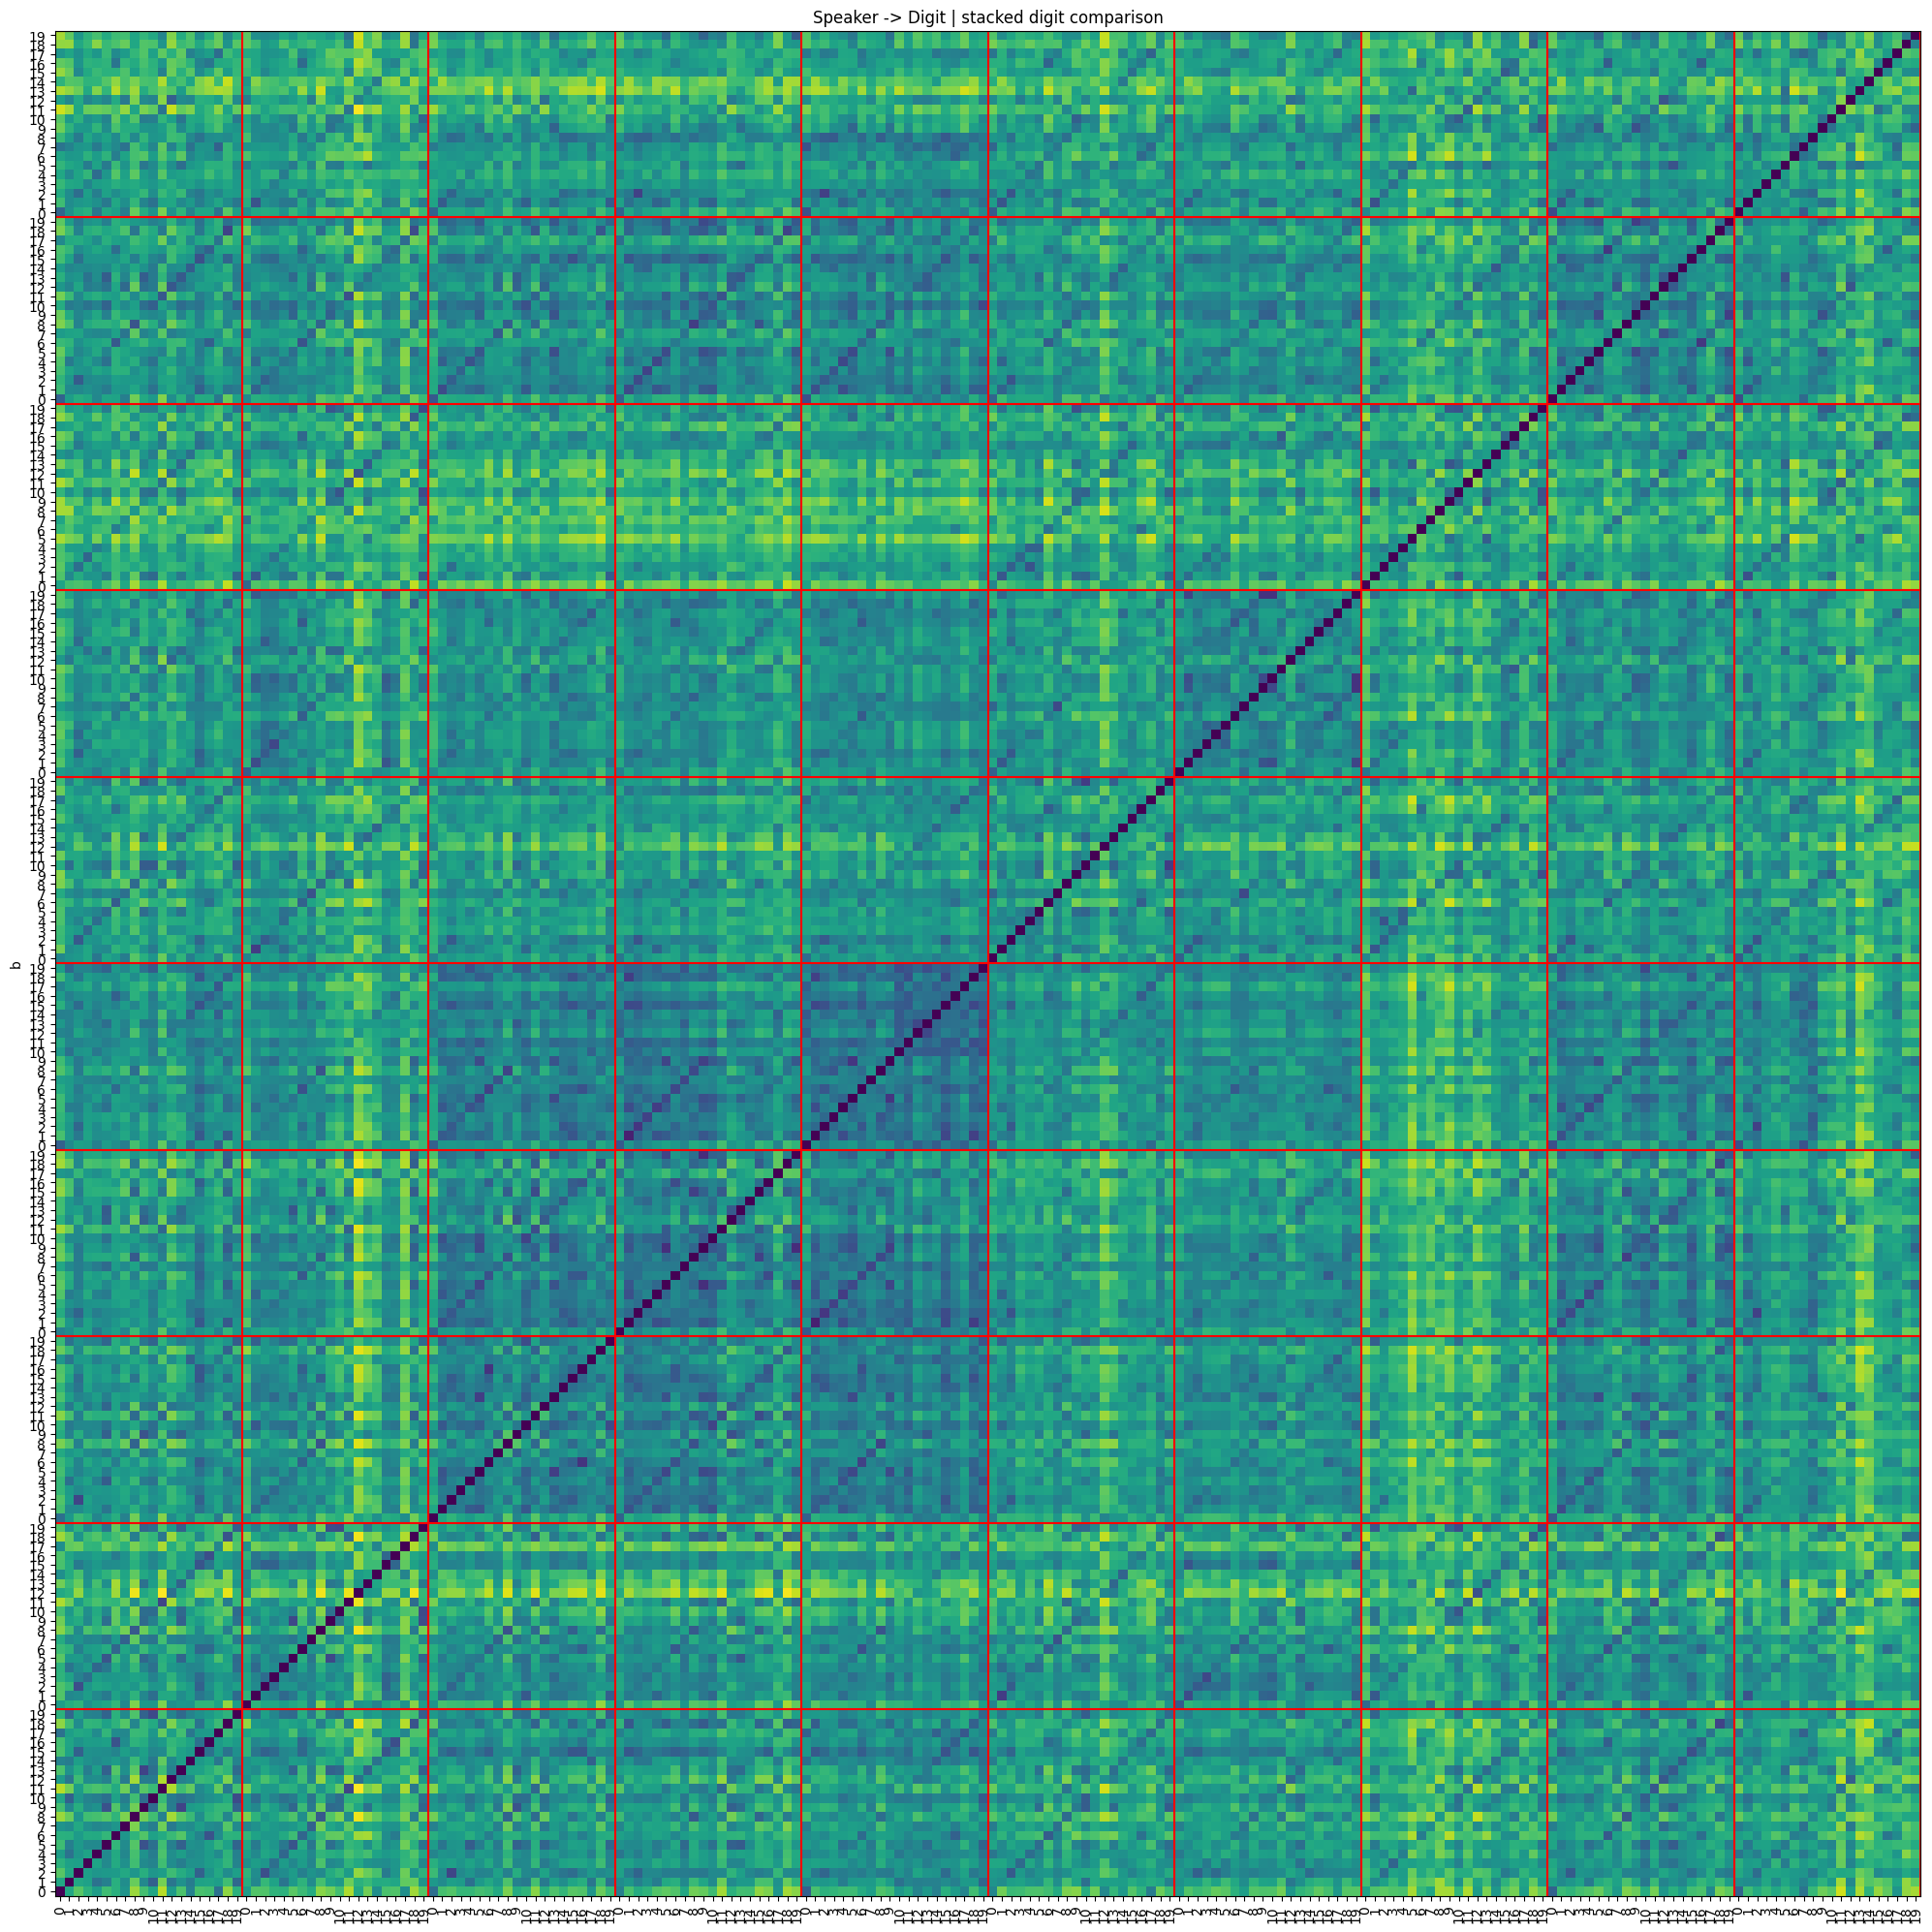

In [4]:
plt.figure(figsize=(25, 25), dpi=100)

plt.imshow(vr_distance_speaker_digit)
plt.xticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 90)
plt.yticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 0)

plt.vlines([(20 * _) + 19.5 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

plt.hlines([(20 * _) + 19.5 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

plt.ylim(-0.5, 199.5)
plt.xlim(-0.5, 199.5)
plt.title("Speaker -> Digit | stacked digit comparison")
plt.ylabel("a")
plt.ylabel("b")
plt.show()

In [5]:
np.tile(np.array(list(range(0, 20, 2))), 10)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18,  0,  2,  4,  6,  8, 10, 12,
       14, 16, 18,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18,  0,  2,  4,  6,
        8, 10, 12, 14, 16, 18,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18,  0,
        2,  4,  6,  8, 10, 12, 14, 16, 18,  0,  2,  4,  6,  8, 10, 12, 14,
       16, 18,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18,  0,  2,  4,  6,  8,
       10, 12, 14, 16, 18,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

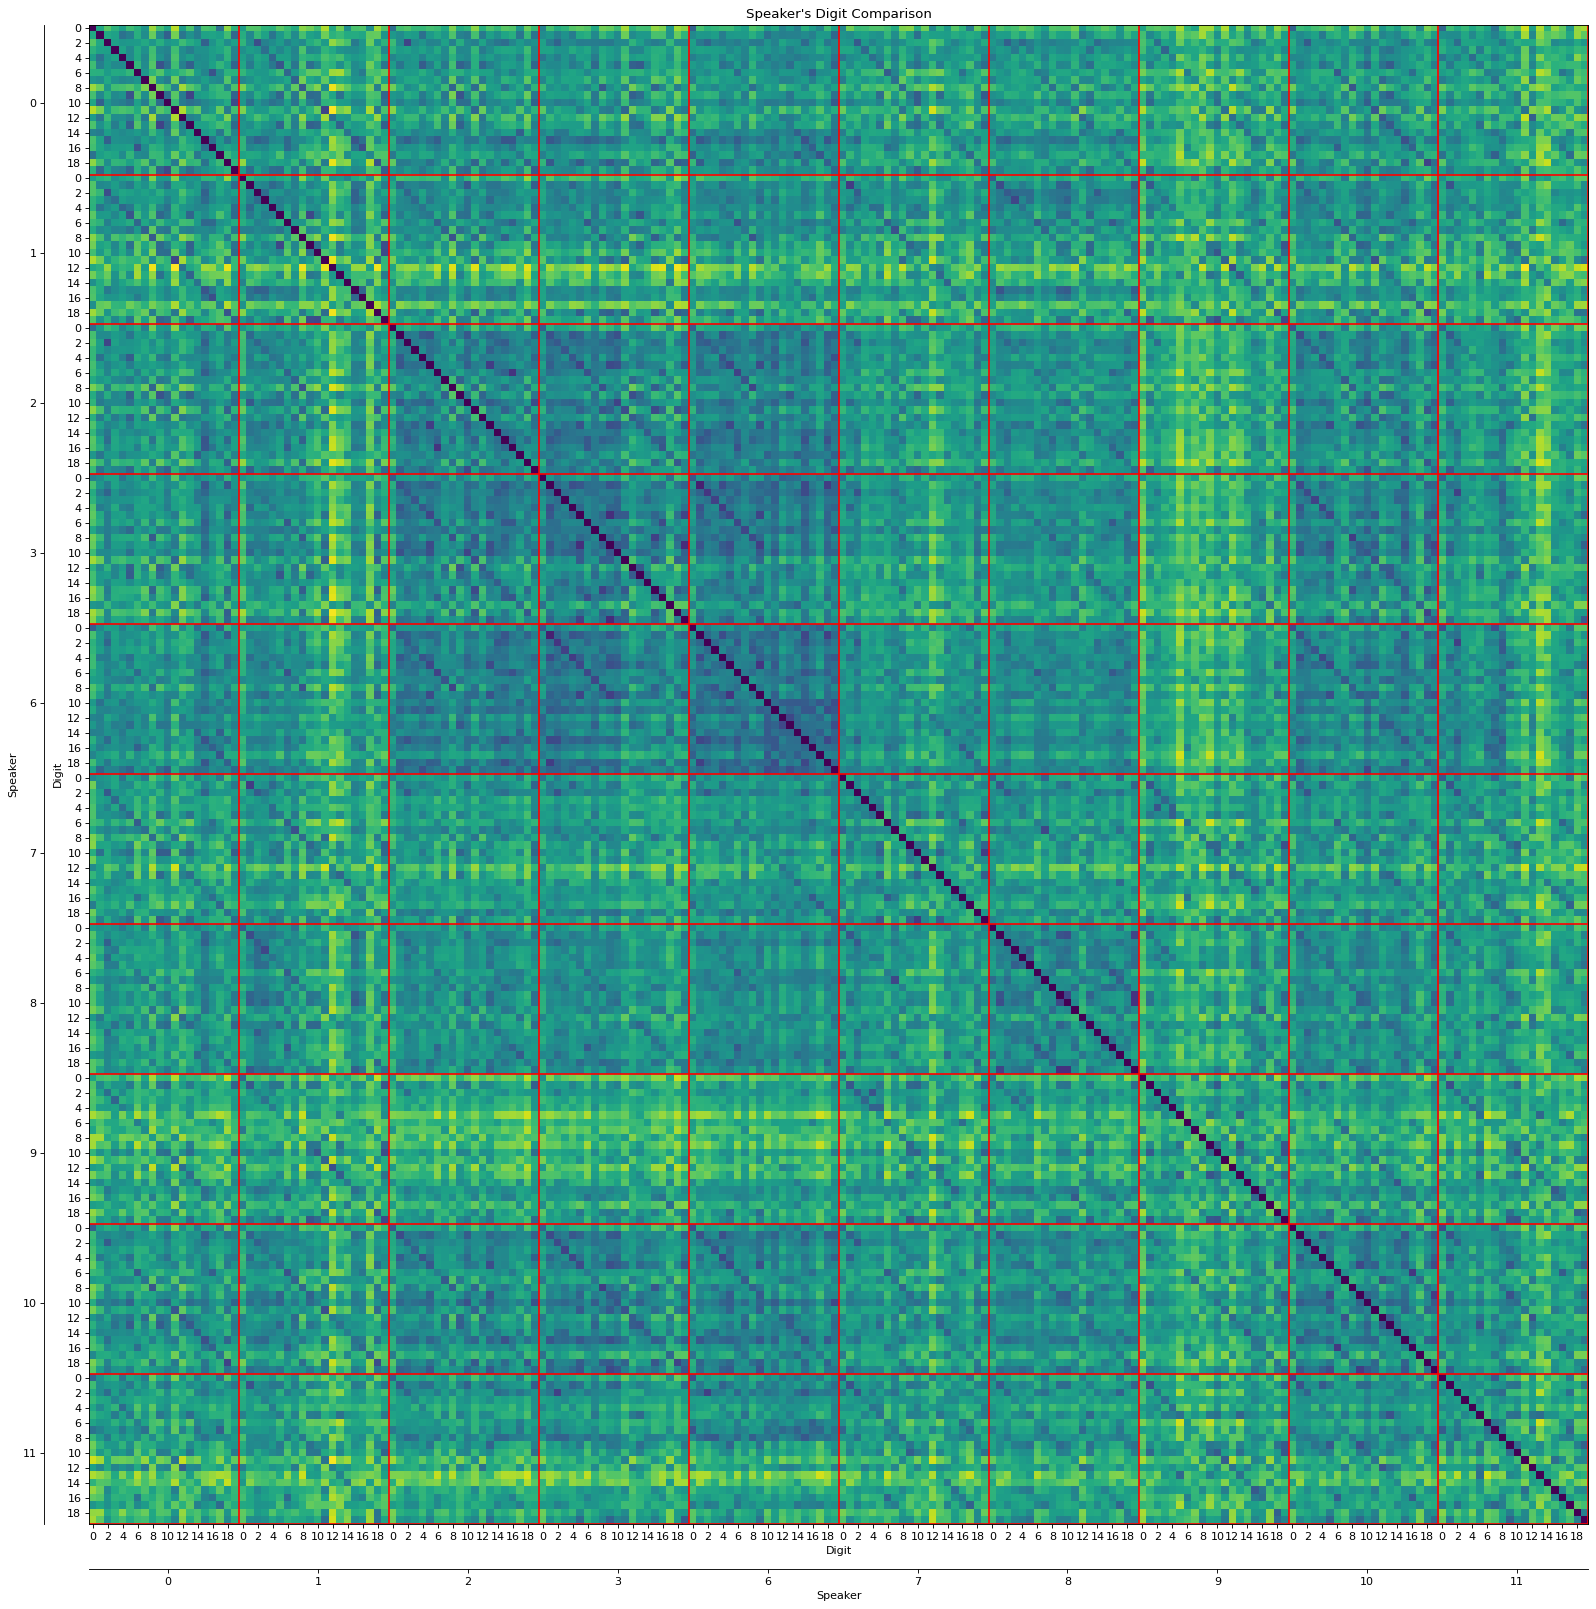

In [6]:

fig, ax1 = plt.subplots(layout = 'constrained', figsize=(20, 20), dpi = 80)



ax1.imshow(vr_distance_speaker_digit)
#ax1.set_xticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 90)
#ax1.set_yticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 0)

ax1.vlines([(20 * _) + 19.5 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

ax1.hlines([(20 * _) + 19.5 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

#sec.set_xticks([5, 15, 25], labels=['\nOughts', '\nTeens', '\nTwenties'])



ax1.set_xticks(range(0, 200, 2), np.tile(np.array(list(range(0, 20, 2))), 10))
ax1.set_xlabel("Digit")

sec = ax1.secondary_xaxis(location=-.03)
sec.set_xticks(range(10, 200, 20), labels = speaker_list_unique)
sec.set_xlabel("Speaker")


ax1.set_yticks(range(0, 200, 2), np.tile(np.array(list(range(0, 20, 2))), 10))
ax1.set_ylabel("Digit")

sec = ax1.secondary_yaxis(location=-.03)
sec.set_yticks(range(10, 200, 20), labels = speaker_list_unique)
sec.set_ylabel("Speaker")

plt.title("Speaker's Digit Comparison")
plt.show()


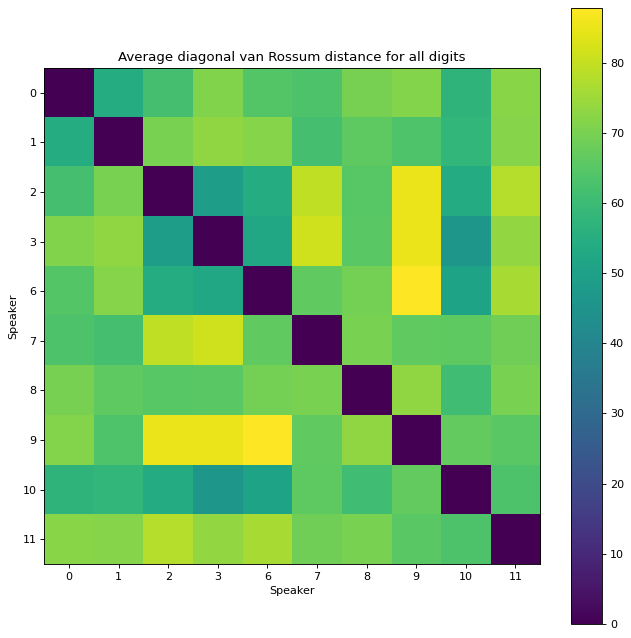

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 10), dpi = 80)

# looking at all digits 

diagonal_values = np.zeros((10, 10))

no_of_digits = 20

for x in range(10):
    for y in range(10):
        diagonal_values[y, x] = np.sum(vr_distance_speaker_digit[y * no_of_digits:(y + 1) * no_of_digits, 
                                                                 x * no_of_digits:(x + 1) * no_of_digits].diagonal()) / no_of_digits

img1 = ax1.imshow(diagonal_values)
ax1.set_xticks(range(10), speaker_list_unique)
ax1.set_yticks(range(10), speaker_list_unique)
ax1.set_title("Average diagonal van Rossum distance for all digits")
ax1.set_xlabel("Speaker")
ax1.set_ylabel("Speaker")
fig.colorbar(img1)
plt.show()

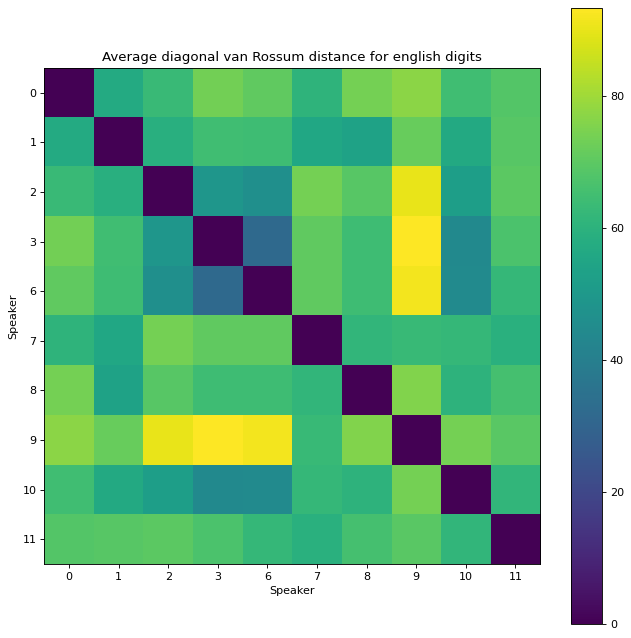

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 10), dpi = 80)

# looking at english digits

diagonal_values = np.zeros((10, 10))

no_of_digits = 10

for x in range(10):
    x *= 2
    for y in range(10):
        y *= 2
        diagonal_values[int(y / 2), int(x / 2)] = np.sum(vr_distance_speaker_digit[y * no_of_digits:(y + 1) * no_of_digits, 
                                                                         x * no_of_digits:(x + 1) * no_of_digits].diagonal()) / no_of_digits

img1 = ax1.imshow(diagonal_values)
ax1.set_xticks(range(10), speaker_list_unique)
ax1.set_yticks(range(10), speaker_list_unique)
ax1.set_title("Average diagonal van Rossum distance for english digits")
ax1.set_xlabel("Speaker")
ax1.set_ylabel("Speaker")
fig.colorbar(img1)
plt.show()

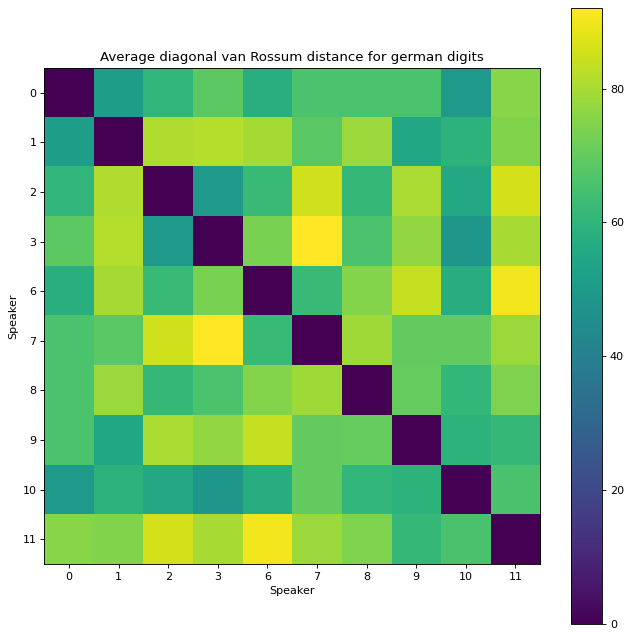

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 10), dpi = 80)

# looking at german digits

diagonal_values = np.zeros((10, 10))

no_of_digits = 10

for x in range(10):
    x *= 2
    x += 1
    for y in range(10):
        y *= 2
        y += 1
        diagonal_values[int(y / 2), int(x / 2)] = np.sum(vr_distance_speaker_digit[y * no_of_digits:(y + 1) * no_of_digits, 
                                                                         x * no_of_digits:(x + 1) * no_of_digits].diagonal()) / no_of_digits

img1 = ax1.imshow(diagonal_values)
ax1.set_xticks(range(10), speaker_list_unique)
ax1.set_yticks(range(10), speaker_list_unique)
ax1.set_title("Average diagonal van Rossum distance for german digits")
ax1.set_xlabel("Speaker")
ax1.set_ylabel("Speaker")
fig.colorbar(img1)
plt.show()

In [10]:
vr_distance_speaker_digit_corse = np.zeros([10, 10])

for index_x in range(10):
    for index_y in range(10):
        vr_distance_speaker_digit_corse[index_x, index_y] = np.mean(vr_distance_speaker_digit[(index_x * 20):((index_x * 20) + 20), (index_y * 20):((index_y * 20) + 20)])

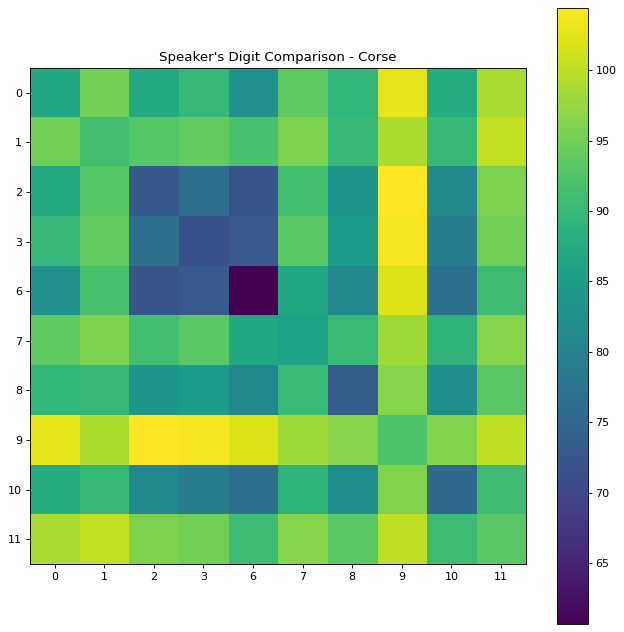

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 10), dpi = 80)

image_1 = ax1.imshow(vr_distance_speaker_digit_corse)

ax1.set_yticks(range(10), speaker_list_unique)
ax1.set_xticks(range(10), speaker_list_unique)
fig.colorbar(image_1)

plt.title("Speaker's Digit Comparison - Corse")
plt.show()

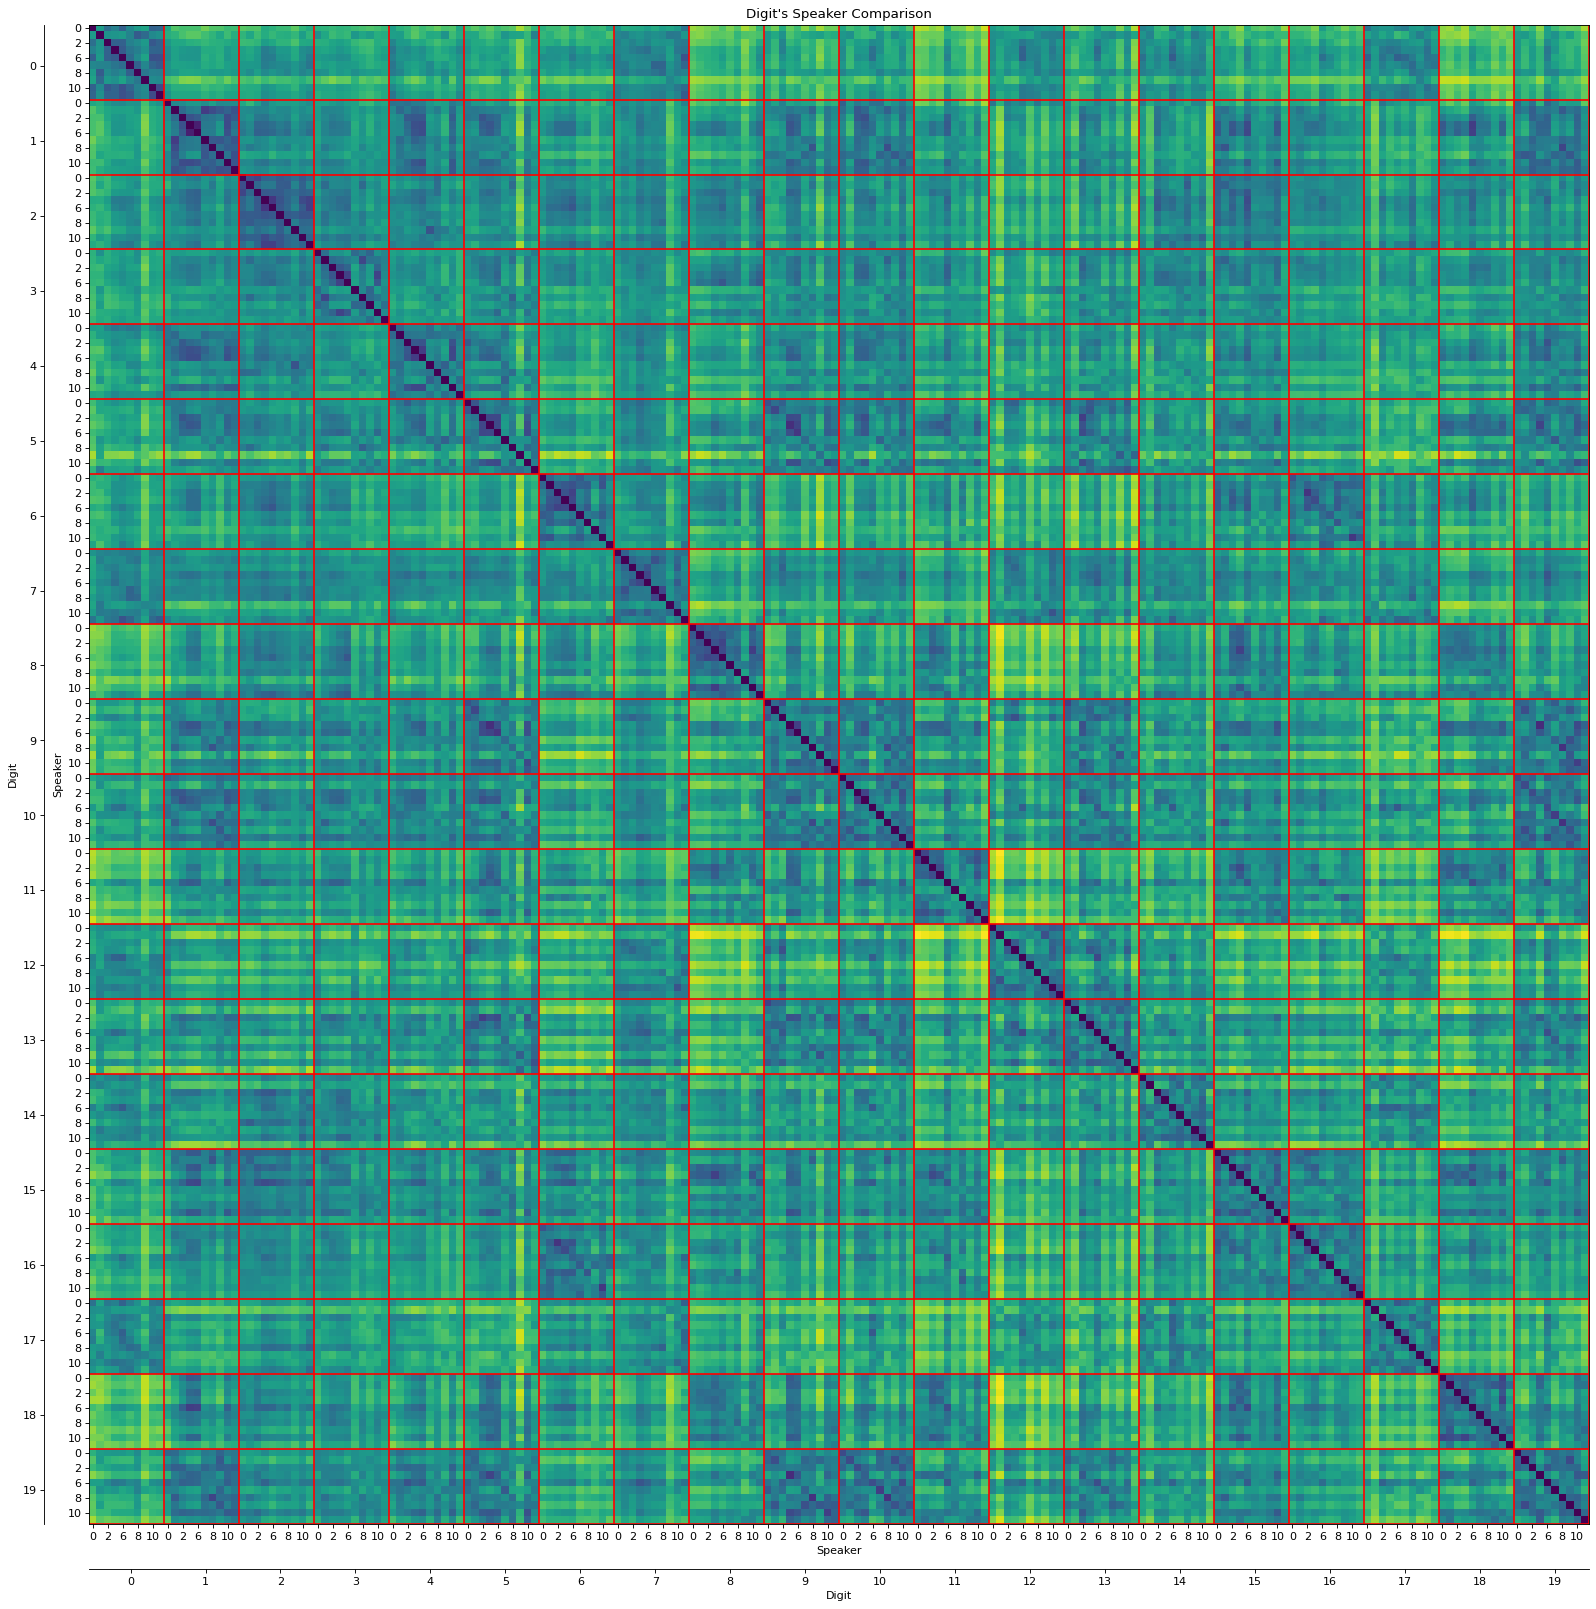

In [12]:
fig, ax1 = plt.subplots(layout = 'constrained', figsize=(20, 20), dpi = 80)

vr_distance_digit_speaker = np.zeros([200, 200])
digit_chosen = 3

for digit_y in range(20):
    for digit_x in range(20):
        for speaker_y in range(10):
            for speaker_x in range(10):
                vr_distance_digit_speaker[speaker_y + (digit_y * 10), speaker_x + (digit_x * 10)] = vr_distance_speaker_digit[(speaker_y * 20) + digit_y, (speaker_x * 20) + digit_x]
        
        

ax1.set_xticks(range(0, 200, 2), np.tile(speaker_list_unique[::2], 20))
ax1.set_xlabel("Speaker")

sec = ax1.secondary_xaxis(location=-.03)
sec.set_xticks(range(5, 200, 10), labels = np.unique(y_train))
sec.set_xlabel("Digit")


ax1.set_yticks(range(0, 200, 2), np.tile(speaker_list_unique[::2], 20))
ax1.set_ylabel("Speaker")

sec = ax1.secondary_yaxis(location=-.03)
sec.set_yticks(range(5, 200, 10), labels = np.unique(y_train))
sec.set_ylabel("Digit")

ax1.vlines([(10 * _) + 9.5 for _ in range(20)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

ax1.hlines([(10 * _) + 9.5 for _ in range(20)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

plt.title("Digit's Speaker Comparison")
plt.imshow(vr_distance_digit_speaker)
plt.show()

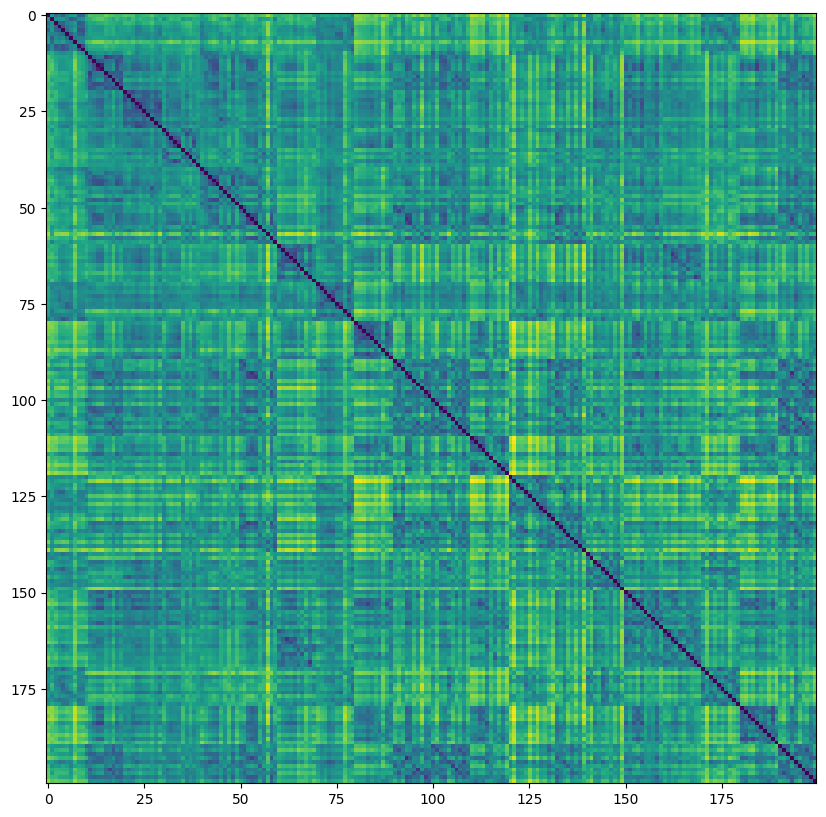

In [13]:
figure(figsize=(20, 10), dpi=100)

vr_distance_digit_speaker = np.zeros([200, 200])
digit_chosen = 3

for digit_y in range(20):
    for digit_x in range(20):
        for speaker_y in range(10):
            for speaker_x in range(10):
                vr_distance_digit_speaker[speaker_y + (digit_y * 10), speaker_x + (digit_x * 10)] = vr_distance_speaker_digit[(speaker_y * 20) + digit_y, (speaker_x * 20) + digit_x]
        
plt.imshow(vr_distance_digit_speaker)
plt.show()

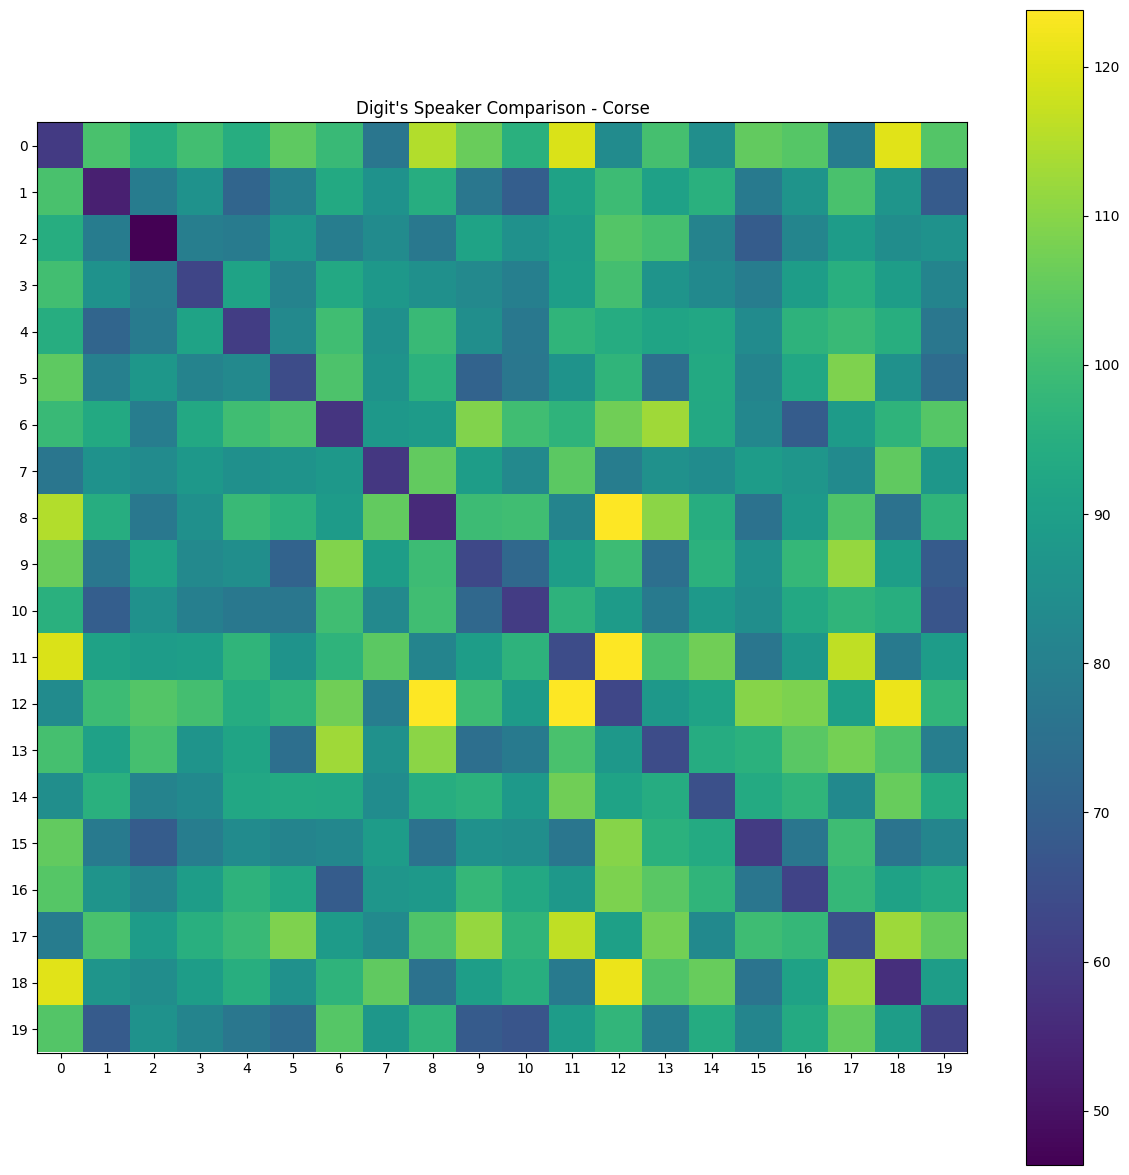

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 15), dpi = 100)

vr_distance_digit_speaker_course = np.zeros([20, 20])

for index_x in range(20):
    for index_y in range(20):
        vr_distance_digit_speaker_course[index_x, index_y] = np.mean(vr_distance_digit_speaker[(index_x * 10):((index_x * 10) + 10), (index_y * 10):((index_y * 10) + 10)])

image_1 = ax1.imshow(vr_distance_digit_speaker_course)

ax1.set_xticks(list(range(20)))
ax1.set_yticks(list(range(20)))
#ax1.set_ylim(-0.5, 19.5)
fig.colorbar(image_1)
plt.title("Digit's Speaker Comparison - Corse")
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
if False:
    x = np.linspace(0, 10, 100)
    vr_distance_digit_speaker_course_values = []

    fig, axes = plt.subplots(4, 5, figsize=(10, 10), sharex=True, sharey=True)
    fig.suptitle('Digit -> Speaker comparison')

    ticks = np.arange(0, 10)

    count = 0
    for i in range(4):
        for j in range(5):
            vr_distance_digit_speaker_course_values.append(np.mean(vr_distance_digit_speaker[:,(count * 10):((count + 1) * 10)]))
            axes[i, j].imshow(vr_distance_digit_speaker[:,(count * 10):((count + 1) * 10)])
            axes[i, j].set_title(f'Digit {count}')
            axes[i, j].set_xticks(ticks)
            axes[i, j].set_yticks(ticks)
            count += 1
            
            if i == 3:
                axes[i, j].set_xlabel('Speakers')
            if j == 0:
                axes[i, j].set_ylabel('Speakers')


    plt.tight_layout()
    plt.show()

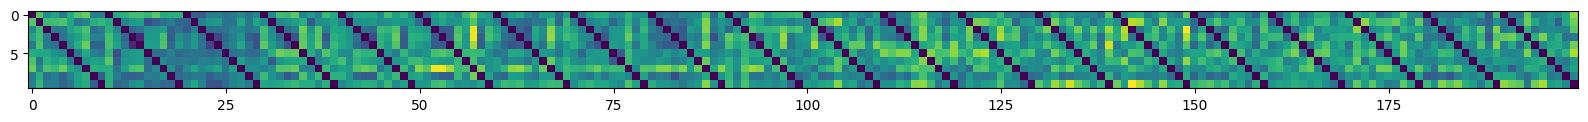

In [16]:
figure(figsize=(20, 10), dpi=100)

vr_distance_digit_speaker = np.zeros([10, 200])
digit_chosen = 3

for digit in range(20):
    for speaker_y in range(10):
        for speaker_x in range(10):
            vr_distance_digit_speaker[speaker_y, speaker_x + (digit * 10)] = vr_distance_speaker_digit[(speaker_y * 20) + digit, (speaker_x * 20) + digit]
        
plt.imshow(vr_distance_digit_speaker)
plt.show()

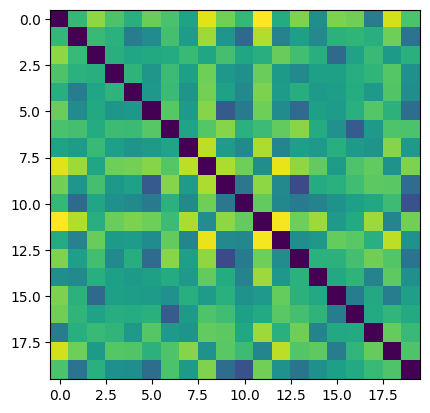

In [17]:
plt.imshow(vr_distance_speaker_digit[:20,:20])